# Introduction to Julia DataFrames

In this notebook, we will provide an introduction to Julia DataFrames using the titanic dataset. We will cover the following topics:

* Loading data into a DataFrame
* Basic data manipulation and analysis using DataFrames
* Exercises for practicing data manipulation and analysis using the titanic dataset in a DataFrame

We assume that you have a basic understanding of Julia programming. If you are new to Julia, we recommend that you complete the [official Julia documentation](https://docs.julialang.org/en/v1/) and/or a Julia tutorial or course before proceeding with this notebook.

To get started, let's load the necessary packages:


In [76]:
# Load necessary packages
using DataFrames
using CSV
using Statistics

## Loading the titanic dataset

The titanic dataset contains information about the passengers on the Titanic, including their age, sex, passenger class, and survival status. We will load this dataset into a DataFrame using the `CSV.jl` package.

To load the titanic dataset, we first need to download the `titanic.csv` file. You can download the file from the [Kaggle website](https://www.kaggle.com/c/titanic/data) and save it in the same directory as this notebook. Once you have downloaded the file, you can use the following code to load it into a DataFrame:

In [77]:
# Load the titanic dataset into a DataFrame using CSV.jl
titanic = DataFrame(CSV.File("titanic.csv"))
first(titanic, 5)

LoadError: ArgumentError: "titanic.csv" is not a valid file or doesn't exist

## Basic data manipulation and analysis using DataFrames

Now that we have loaded the titanic dataset into a DataFrame, we can start exploring and analyzing the data. We will use basic DataFrame functions such as `head`, `describe`, and `groupby` to do so.

Let's start by determining the number of rows and columns in the titanic DataFrame:

In [ ]:
# Determine the number of rows and columns in the titanic DataFrame
nrows, ncols = size(titanic)
println("Number of rows: ", nrows)
println("Number of columns: ", ncols)

Number of rows: 891
Number of columns: 12


Next, let's print a summary of the titanic DataFrame using the `describe` function:

In [ ]:
# Print a summary of the titanic DataFrame using the describe function
describe(titanic)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PassengerId,446.0,1,446.0,891,0,Int64
2,Survived,0.383838,0,0.0,1,0,Int64
3,Pclass,2.30864,1,3.0,3,0,Int64
4,Name,,"Abbing, Mr. Anthony",,"van Melkebeke, Mr. Philemon",0,String
5,Sex,,female,,male,0,String7
6,Age,29.6991,0.42,28.0,80.0,177,"Union{Missing, Float64}"
7,SibSp,0.523008,0,0.0,8,0,Int64
8,Parch,0.381594,0,0.0,6,0,Int64
9,Ticket,,110152,,WE/P 5735,0,String31


Now let's filter the titanic DataFrame to include only survivors and print the first 5 rows:

In [ ]:
# Filter the titanic DataFrame to include only survivors and print the first 5 rows
survivors = filter(row -> row.Survived == 1, titanic)
first(survivors, 5)

Row,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,Int64,String,String7,Float64?,Int64,Int64,String31,Float64,String15?,String1?
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,missing,S
5,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,missing,C


We can also calculate the percentage of survivors in the titanic DataFrame:

In [ ]:
# Calculate the percentage of survivors in the titanic DataFrame
prop_survivors = mean(titanic.Survived)
println("Proportion of survivors: ", prop_survivors)

Proportion of survivors: 0.3838383838383838


We can group the titanic DataFrame by passenger class and calculate the average age in each class:

In [ ]:
# Group the titanic DataFrame by passenger class and calculate the average age in each class, ignoring missing values
class_ages = combine(groupby(titanic, :Pclass), :Age => (x -> mean(skipmissing(x))) => :AvgAge)

Row,Pclass,AvgAge
,Int64,Float64
1,1,38.2334
2,2,29.8776
3,3,25.1406


Let's add a new column to the titanic DataFrame that indicates whether a passenger is a child or an adult, based on their age:

In [ ]:
is_child(age) = ismissing(age) ? missing : age < 18
titanic[!, :Child] = is_child.(titanic.Age)
first(titanic, 5)

Row,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
,Int64,Int64,Int64,String,String7,Float64?,Int64,Int64,String31,Float64,String15?,String1?,Bool?
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S,false
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,false
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S,false
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,false
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S,false


We can also group the titanic DataFrame by age category and calculate the proportion of survivors in each category:

In [ ]:
# Group the titanic DataFrame by age category and calculate the proportion of survivors in each category
age_cat_prop_survivors = combine(groupby(titanic, :Child), 
    :Survived => mean => :PropSurvivors)

Row,Child,PropSurvivors
,Bool?,Float64
1,false,0.381032
2,true,0.539823
3,missing,0.293785


In [ ]:
# Group by passenger class and calculate proportion of survivors in each group
class_cat_prop_survivors = combine(groupby(titanic, :Pclass), :Survived => mean => :PropSurvivors)

Row,Pclass,PropSurvivors
,Int64,Float64
1,1,0.62963
2,2,0.472826
3,3,0.242363


Finally, let's plot the proportion of survivors by age category using the `Plots` package:

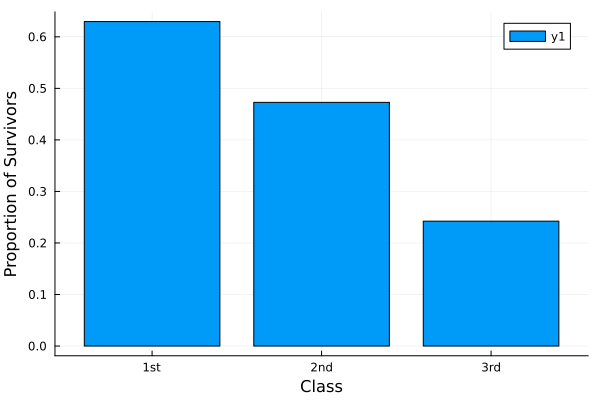

In [ ]:
# Plot the proportion of survivors by age category using the Plots package
using Plots
gr()
bar(class_cat_prop_survivors.Pclass, class_cat_prop_survivors.PropSurvivors,
    xlabel="Class", ylabel="Proportion of Survivors", legend=true,
    xticks=(1:3, ["1st", "2nd", "3rd"]))